In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [2]:
imp.reload(CalHMM)

<module 'CalHMM' from '/Users/daiyiluo/Documents/ELEC599/CalHMM.py'>

## a. Load data

In [3]:
folder = '/Users/daiyiluo/Downloads/KQ095_210205' #KQ086_210110' #
timebin = 500

In [4]:
data = np.load(f'{folder}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = data['lap_end']
idx = data['idx']
del data

Spike = np.load(f'{folder}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape, idx.shape

((1821, 219), (1821,), (1821,))

## b. Run Poisson HMM
### Original data

In [5]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance)
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1)

print(f'Error Rate: {err_rate1}')

Error Rate: 0.17524573001372906


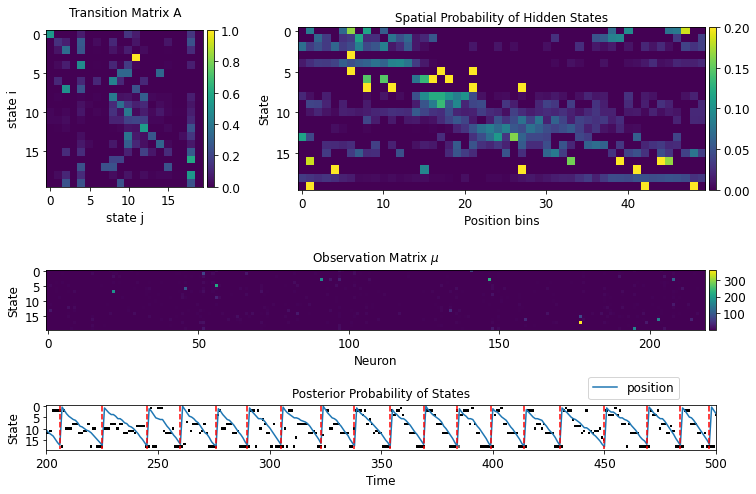

In [6]:
_, _, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

### Time Shuffle

In [7]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

Error Rate: 0.1848001274267469


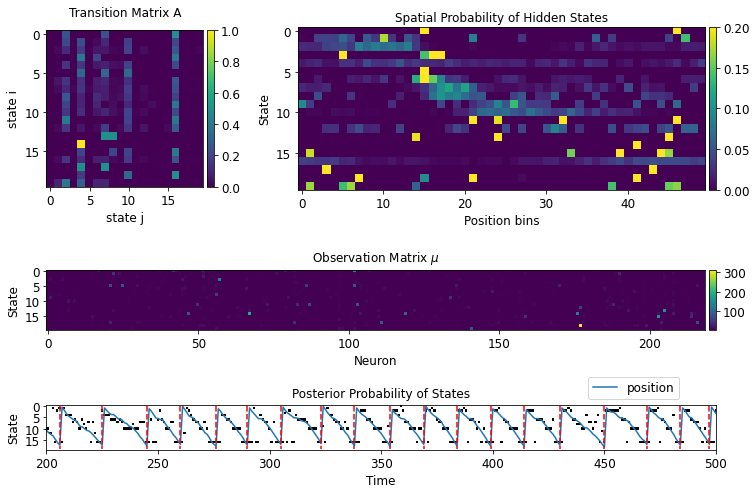

In [8]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')